# SAYISAL HESABIN NİTELİKLERİ

## BİLGİSAYARDA SAYI TEMSİLLERİ

En küçük hafıza birimi **bit** (**bi**nary digi**t**) adlandırılır.

**1 bytes**, (bayt) diye okuyoruz, 8 bit içerir.

1 bytes = 8 bit

8 bit'te $2^8 = 256 = 0, 1, \dots, 254, 255$ bilgi saklanabilir.

<img src="./sekiller/units_policy_ubuntu.png" width="50%" />

[comment]: ![](./sekiller/units_policy_ubuntu.png)
[//]: ![](./sekiller/units_policy_ubuntu.png)



### TAM SAYILAR

Saklanabilecek tam sayı büyüklüğünü ayrılan bit sayısı (veya byte) belirler.  

#### 16 bit = 2 bytes'lık olanlar

In [1]:
# Bütün hepsi pozitifken
enBuyuk_16bit_Pozitif_TamSayi = 2**16
print enBuyuk_16bit_Pozitif_TamSayi

65536


In [2]:
# Yarısı negatif / Yarısı Pozitif
enKucuk_16bit_Negatif_TamSayi = -2**16/2
enBuyuk_16bit_Pozitif_TamSayi = 2**16/2 - 1
print enKucuk_16bit_Negatif_TamSayi
print 0
print enBuyuk_16bit_Pozitif_TamSayi

-32768
0
32767


In [3]:
# 10'luktan 2'lik tabana çevirim
tamSayi10 = raw_input("10'luk tabandaki tam sayı = ?")
tamSayi10 = int(tamSayi10)

bolum = abs(tamSayi10)
if bolum!=0:
    while bolum>0:
        print bolum, bolum%2
        bolum = int(bolum/2.)
else:
    print 0

MTAnbHVrIHRhYmFuZGFraSB0YW0gc2F5xLEgPSA/
 1212 0
6 0
3 1
1 1


In [4]:
# 10'luktan herhangi bir tabana çevirim
taban = 2
bolum = tamSayi10
while bolum>0:
    print bolum, bolum%taban
    bolum = int(bolum/taban)

12 0
6 0
3 1
1 1


In [5]:
# çıktısı düzenlenmiş
taban = 2
bolum = tamSayi10
tamSayi2 = ""
while bolum>0:
    kalan = bolum % taban
    tamSayi2 = str(kalan) + tamSayi2 
    #tamSayi2 = tamSayi2 + str(kalan)
    bolum = int(bolum/taban)

print "(%s)_10 = (%s)_%s"%(tamSayi10, tamSayi2, taban)

(12)_10 = (1100)_2


In [6]:
#çıktısı 16 bit'e göre düzenlenmiş tam sayı
def sgn(x):
    if x>=0:
        s="0"
    else:
        s="1"
    return s

#tamSayi10 = 2**15-1
tamSayi10 = -2**15+1
tamSayi10 = -13
taban = 2
isaret = sgn(tamSayi10)

bolum = abs(tamSayi10)
tamSayi2 = ""
while bolum>0:
    kalan = bolum % taban
    tamSayi2 = str(kalan) + tamSayi2
    bolum = int(bolum/taban)

print "".join([str(i%10) for i in range(1, 17)])
print isaret + "0"*(15-len(tamSayi2)) + tamSayi2
print "(%s)_10 = (%s%s)_2 "%(tamSayi10 , isaret , "0"*(15-len(tamSayi2)) + tamSayi2)

1234567890123456
1000000000001101
(-13)_10 = (1000000000001101)_2 


In [7]:
a = 2**1000
print a

10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376


# REEL SAYILAR

https://www.h-schmidt.net/FloatConverter/IEEE754.html

## $y = (1 + M)*2^x$

In [8]:
from math import log
y = 0.1

us = int(log(y, 2))-1
mantis = y/2**us

print "2^%s"%us
print mantis

2^-4
1.6


## 32 bitlik sistemde mantis kısmının hesaplanışı

### (0.5)_10 = (0.10000000000000000000000)_2
### (0.25)_10 = (0.01000000000000000000000)_2

Bu tür ondalık sayılar için aşağıdaki şartı incelemek gerekiyor.  
İncelendiğinde basamak değişkeninin 1 azaltılmadığı görülür.

```python
if basamak>log(gecici,2):
    basamak -= 1
```

In [9]:
from math import log

ondalik10 = .125
ondalik2List = ["0"]*23

gecici = ondalik10
basamak = 0
while abs(basamak)<23 and gecici>0:
    basamak = int(log(gecici,2))
    print basamak, log(gecici,2), gecici
    if basamak>log(gecici,2):
        basamak -= 1
    if abs(basamak)>23: break
    print basamak, log(gecici,2), gecici
    ondalik2List[abs(basamak)-1] = "1"
    gecici= gecici - 2**basamak

ondalik2 = ''.join(ondalik2List)
print ondalik2

-3 -3.0 0.125
-3 -3.0 0.125
00100000000000000000000


### (0.6)_10 = (0.10011001100110011001100)_2
### (0.7)_10 = (0.10110011001100110011001)_2

Bu tür ondalık sayılar için aşağıdaki şartı incelemek gerekiyor.  
İncelendiğinde basamak değişkeninin 1 azaltıldığı görülür.

```python
if basamak>log(gecici,2):
    basamak -= 1
```

In [10]:
ondalik2List = ["0"]*23
ondalik2List[abs(-23)-1] = '1'
''.join(ondalik2List)

'00000000000000000000001'

In [11]:
from math import log

ondalik10 = .6
ondalik2List = ["0"]*23

gecici = ondalik10
basamak = 0
while abs(basamak)<23 and gecici>0:
    basamak = int(log(gecici,2))
    #print basamak, log(gecici,2), gecici
    if basamak>log(gecici,2):
        basamak -= 1
    if abs(basamak)>23: break
    print basamak, log(gecici,2), gecici
    ondalik2List[abs(basamak)-1] = "1"
    gecici = gecici - 2**basamak

ondalik2 = ''.join(ondalik2List)
print ondalik2

-1 -0.736965594166 0.6
-4 -3.32192809489 0.1
-5 -4.73696559417 0.0375
-8 -7.32192809489 0.00625
-9 -8.73696559417 0.00234375
-12 -11.3219280949 0.000390625
-13 -12.7369655942 0.000146484375
-16 -15.3219280949 2.44140625e-05
-17 -16.7369655942 9.15527343748e-06
-20 -19.3219280949 1.52587890623e-06
-21 -20.7369655942 5.72204589822e-07
10011001100110011001100


In [12]:
#12345678901234567890123
10011001100110011001100
10011001100110011001100

10011001100110011001100L

## 64 bitlik sistemde mantis kısmının hesaplanışı

In [13]:
from math import log

ondalikBit = 52
ondalik10 = .6
ondalik2List = ["0"]*ondalikBit

gecici = ondalik10
basamak = 0
while abs(basamak)<ondalikBit and gecici>0:
    basamak = int(log(gecici,2))
    if basamak>log(gecici,2):
        basamak -= 1
    if abs(basamak)>ondalikBit: break
    print basamak, gecici
    ondalik2List[abs(basamak)-1] = "1"
    gecici= gecici - 2**basamak

ondalik2 = ''.join(ondalik2List)
print ondalik2

-1 0.6
-4 0.1
-5 0.0375
-8 0.00625
-9 0.00234375
-12 0.000390625
-13 0.000146484375
-16 2.44140625e-05
-17 9.15527343748e-06
-20 1.52587890623e-06
-21 5.72204589822e-07
-24 9.53674316184e-08
-25 3.5762786843e-08
-28 5.96046445533e-09
-29 2.23517415687e-09
-32 3.72529007642e-10
-33 1.39698363988e-10
-36 2.32830421609e-11
-37 8.73112693256e-12
-40 1.45516931838e-12
-41 5.45674616603e-13
-44 9.09272657168e-14
-45 3.4083846856e-14
-48 5.66213742559e-15
-49 2.10942374679e-15
-52 3.33066907388e-16
1001100110011001100110011001100110011001100110011001


## 32, 64 veya 128 bitlik sistemde reel sayılar

128 bit malesef çalışmıyor!?

In [14]:
from math import log
x = int(log(0.1, 2))
print 0.1/2**(x-1)
print x-1

1.6
-4


In [15]:
from math import log

# verilen bir sayının işaretinin
# 2'lik (binary) temsili
def sgn(x):
    if x>=0:
        s="0" # +1
    else:
        s="1" # -1
    return s

isaretliSayi = -1.234
kacBit = 128

isaret = sgn(isaretliSayi)
sayi10 = abs(isaretliSayi)

# 32, 64, 128 bit dağılımları
# https://en.wikipedia.org/wiki/Quadruple-precision_floating-point_format
bitH = {32:[1, 8, 23], 64:[1, 11, 52], 128:[1, 15, 112]} 
usBit = bitH[kacBit][1]
ondalikBit = bitH[kacBit][2]

# verilen bir reel sayıyı 1.M x 2^us şekline çevir
us = int(log(sayi10, 2))
if 2**us>sayi10:
    us = us - 1
# mantis = 1.M - 1
mantis = sayi10/2**us - 1

# 2^us kısmının 32 veya 64 bit temsili
us2lik = us + 2**(usBit-1)-1
bolum = us2lik
tamSayi2 = ""
while bolum>0:
    kalan = bolum % 2
    tamSayi2 = str(kalan) + tamSayi2
    bolum = int(bolum/2.)

# verilen sayının ondalık kısmının 2'lik
# temsilinin kaydedileceği liste
ondalik2List = ["0"]*ondalikBit

# ondalık kısım 2'lik sisteme çeviriliyor
gecici = mantis
basamak = 0
while abs(basamak)<ondalikBit and gecici>0:
    basamak = int(log(gecici,2))
    if basamak>log(gecici,2):
        basamak -= 1
    if abs(basamak)>ondalikBit: break
    #print basamak, gecici
    ondalik2List[abs(basamak)-1] = "1"
    gecici= gecici - 2**basamak

ondalik2 = ''.join(ondalik2List)

print "".join([str(i%10) for i in range(1, kacBit+1)])
print isaret + "0"*(usBit-len(tamSayi2)) + tamSayi2 + ondalik2
print "işaret: isaret = %+i = (%s)_2"%(-2*int(isaret)+1, isaret)
print "2^us  : us = %s = %s = (%s)_2"%(us,us2lik,tamSayi2)
print "mantis: mantis = %s = (%s)_2"%(mantis, ondalik2)

12345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345678
10111111111111110011101111100111011011001000101101000011100101011000000000000000000000000000000000000000000000000000000000000000
işaret: isaret = -1 = (1)_2
2^us  : us = 0 = 16383 = (11111111111111)_2
mantis: mantis = 0.234 = (0011101111100111011011001000101101000011100101011000000000000000000000000000000000000000000000000000000000000000)_2


### 2'likten tekrar 10'luk sisteme çevirim

In [16]:
# 2'lik sistemden tekrar ondalik sisteme çevirim
isaret10 = (-2*int(isaret)+1)
ondalik2den10a = 0
for i,b in enumerate(ondalik2):
    ondalik2den10a += int(b)*2**-(i+1)

sayi2den10a = isaret10*(1+ondalik2den10a)*2**us

print "orjinal sayı =", isaretliSayi
print "çevirilen sayı =", sayi2den10a
print "hata miktarı =", (isaretliSayi-sayi2den10a)

orjinal sayı = -1.234
çevirilen sayı = -1.234
hata miktarı = 0.0


# SAYISAL HATA TÜRLERİ
1. **Yuvarlama Hatası (Round-off error)**
 - http://mathworld.wolfram.com/RoundoffError.html
 - Roundoff error occurs because of the computing device's inability to deal with certain  
 numbers. Such numbers need to be rounded off to some near approximation which is dependent  
 on the word size used to represent numbers of the device.

2. **Kesme Hatası (Truncation Error)**
 - https://tr.0wikipedia.org/wiki/Kesme_hatası
 - Truncation error refers to the error in a method, which occurs because some  
 series (finite or infinite) is truncated to a fewer number of terms. Such errors are  
 essentially algorithmic errors and we can predict the extent of the error that will  
 occur in the method.


## YUVARLAMA HATASI

### Her zaman A - A = 0 olmayabilir.
#### FORTRAN

In [17]:
%%sh
# fortran programını oluştur
cat > fortran_Programi.for << EOF
C FORTRAN PROGRAMI BAŞI
C       REAL*4 A
C       REAL*8 B, Z
       A = COS(1.1)
       B = SIN(1.1)
       Z = A - (A/B)*B
       PRINT *, A
       PRINT *, (A/B)*B
       PRINT *, Z
       END
C FORTRAN PROGRAMI SONU
EOF

# fortran programı derle
#
# gfortran derleyicisi
# gfortran -o fortran_Programi fortran_Programi.for
#
# f77 derleyicisi
f77 -o fortran_Programi fortran_Programi.for

# fortran programını çalıştır
./fortran_Programi

# fortran programını sil
#rm -f fortran_Programi*

  0.453596085    
  0.453596085    
   0.00000000    


#### PYTHON

In [18]:
from math import *
A = cos(1.1)
B = sin(1.1)
Z = A - (A/B)*B
print A
print (A/B)*B
print Z

0.453596121426
0.453596121426
-5.55111512313e-17


In [19]:
from math import *
A = cos(1.1)
B = sin(1.1)
Z = A - (A/B)*B
A

0.4535961214255773

In [20]:
from math import *
A = cos(1.1)
B = sin(1.1)
Z = A - (A/B)*B
(A/B)*B

0.45359612142557737

In [21]:
0.4535961214255773
0.45359612142557737

0.45359612142557737

### Küçük ve büyük sayıları yan yana getirmek risklidir.

#### FORTRAN

In [22]:
%%sh
# fortran programını oluştur
cat > fortran_Programi.for << EOF
        REAL*16 TOPLAM
        TOPLAM = 1.0
        DO 10, I = 1, 10000
            TOPLAM = TOPLAM + 0.00001
10      CONTINUE
        PRINT *, 'TOPLAM = ', TOPLAM
        END
C FORTRAN PROGRAMI SONU
EOF

# fortran programı derle
# f77 derleyicisi
f77 -o fortran_Programi fortran_Programi.for

# fortran programını çalıştır
./fortran_Programi

# fortran programını sil
rm -f fortran_Programi*

 TOPLAM =    1.09999999747378751635551452636718750      


#### PYTHON

In [23]:
toplam = 1.0
for i in range(10000):
    toplam += 0.00001
print 'toplam = ', toplam

toplam =  1.1


In [24]:
toplam = 1.0
for i in range(10000):
    toplam += 0.00001
toplam

1.1000000000006551

In [25]:
whos

Variable                        Type                          Data/Info
-----------------------------------------------------------------------
A                               float                         0.453596121426
B                               float                         0.891207360061
Z                               float                         -5.55111512313e-17
a                               long                          1071508607186267320948425<...>1652624386837205668069376
acos                            builtin_function_or_method    <built-in function acos>
acosh                           builtin_function_or_method    <built-in function acosh>
asin                            builtin_function_or_method    <built-in function asin>
asinh                           builtin_function_or_method    <built-in function asinh>
atan                            builtin_function_or_method    <built-in function atan>
atan2                           builtin_function_or_method    <bui

In [26]:
2004**.5 - 2003**.5

0.011170569998292024

In [27]:
1./(2004**.5 + 2003**.5)

0.011170569998288152

In [28]:
0.011170569998292024
0.011170569998288152

0.011170569998288152

In [29]:
for i in range(1, 20):
    buyukSayi = 2*10**i
    sayi1 = buyukSayi + 3
    sayi2 = buyukSayi + 4
    fark1 = sayi2**.5 - sayi1**.5
    toplam = sayi2**.5 + sayi1**.5
    fark2 = 1/toplam
    hata = fark2-fark1
    print "%20s %25.24s %25.24s %25.24s"%(buyukSayi, fark1, fark2, hata)

                  20            0.103147962254            0.103147962254         1.38777878078e-17
                 200           0.0350500083107           0.0350500083107        -1.55431223448e-15
                2000           0.0111705699983           0.0111705699983        -3.87190279838e-15
               20000          0.00353522458758          0.00353522458759         9.60516388648e-15
              200000          0.00111802420605          0.00111802420608         3.13141439862e-14
             2000000         0.000353553081368         0.000353553081234        -1.33397524797e-13
            20000000           0.0001118033897         0.000111803389092        -6.07878032849e-13
           200000000         3.53553386958e-05           3.535533875e-05         5.41598490773e-14
          2000000000         1.11803456093e-05         1.11803398777e-05        -5.73160231299e-12
         20000000000         3.53553332388e-06         3.53553390562e-06         5.81739367744e-13
        20

In [30]:
import sympy as sym
sayi1N = sym.N(sayi1,100)
sayi2N = sym.N(sayi2,100)

sayi1Nr = sayi1N**sym.Rational(1,2)
sayi2Nr = sayi2N**sym.Rational(1,2)

sayi1Ns = sym.sqrt(sayi1N)
sayi2Ns = sym.sqrt(sayi2N)

farkR = sayi2Nr - sayi1Nr
farkS = sayi2Ns - sayi1Ns

farkBr = sym.N(1,100)/(sayi2Nr + sayi1Nr)
farkBs = sym.N(1,100)/(sayi2Ns + sayi1Ns)

print sayi1N
print sayi2N
print sayi1Nr
print sayi1Ns
print sayi2Nr
print sayi2Ns
print farkR
print farkS
print farkBr
print farkBs

20000000000000000003.00000000000000000000000000000000000000000000000000000000000000000000000000000000
20000000000000000004.00000000000000000000000000000000000000000000000000000000000000000000000000000000
4472135954.999579393153757534087520925330034887159306566816528984054165004869975089273649906461843602
4472135954.999579393153757534087520925330034887159306566816528984054165004869975089273649906461843602
4472135954.999579393265560932962510410140710773194308798668062494033534023471512729486361547165845160
4472135954.999579393265560932962510410140710773194308798668062494033534023471512729486361547165845160
0.0000000001118033988749894848106758860350022318515335099793690186015376402127116407040015586068429276438400787
0.0000000001118033988749894848106758860350022318515335099793690186015376402127116407040015586068429276438400787
0.0000000001118033988749894848106758860350022318515335099793690186015376402127116407040015586157591786093499367
0.00000000011180339887498948481067588603500223185153

# ALIŞTIRMALAR

In [31]:
# En basit şekilde kütüphane aşağıdaki gibi çağırılır
import math

math.cos(3.14159)

-0.9999999999964793

### 1.3 - Fonksiyonlar

In [32]:
def f(x):
    return x*((x+1)**.5 - x**.5)

def g(x):
    return x/((x+1)**.5 + x**.5)

sayi = 100000.
fark = f(sayi) - g(sayi)
print "%34.30f %34.30f %34.30f"%(f(sayi), g(sayi), fark)

158.113487725586310261860489845276 158.113487725687832607945892959833  -0.000000000101522346085403114557


### 1.4 - Başka fonksiyonlar

In [33]:
# help(math)

In [34]:
from math import *
x = 0.001
print 1 - cos(x)

x = 1000
print log(x+1) - log(x)

x = 0.249*math.pi
print cos(x)**2 - sin(x)**2

x = 1000
print (x**2+1)**.5 - x

x = 0.249*math.pi
print sin(x) - cos(x)

x = 10
print exp(3*x) - 3*exp(2*x) + 5*exp(x) - 1

4.99999958326e-07
0.000999500333084
0.00628314396556
0.000499999875046
-0.00444287562991
1.06850191961e+13


### 1.5 polinom kökleri

In [35]:
a = 1.
b = 1000.001
c = 1.
delta = (b**2 - 4*a*c)**.5
x1 = (-b - delta)/(2*a)
x2 = (-b + delta)/(2*a)
x2c = c/x1
print x1
print x2
print x2c

-1000.0
-0.000999999999976
-0.001


In [36]:
def kok(a,b,c):
    delta = (b**2 - 4*a*c)**.5
    x1 = (-b - delta)/(2*a)
    x2 = (-b + delta)/(2*a)
    return x1, x2

In [37]:
print kok(1., 1000.001, 1.)
print kok(1., -4, 3.999999)

(-1000.0, -0.0009999999999763531)
(1.9989999999999302, 2.00100000000007)


In [38]:
sart = True
while sart==True:
    a = complex(raw_input('a'))
    b = complex(raw_input('b'))
    c = complex(raw_input('c'))
    print kok(a,b,c)
    devam_mi = raw_input(u'Devam mı?(E/H)')
    if devam_mi.upper()!='E':
        sart = False

a 1b 2c 3((-1-1.4142135623730951j), (-0.9999999999999999+1.4142135623730951j))
RGV2YW0gbcSxPyhFL0gp
 Ea 2b 3c 4((-0.7500000000000001-1.1989578808281798j), (-0.7499999999999999+1.1989578808281798j))
RGV2YW0gbcSxPyhFL0gp
 h

### 1.6 Binom dağılımı

## $\binom{n}{m} = \frac{n!}{m! (n-m)!}$

In [39]:
n = 100
m = 98

pay = 1
for i in range(1, n+1):
    pay = pay*i

paydaM = 1
for i in range(1, m+1):
    paydaM = paydaM*i

paydaNM = 1
for i in range(1, (n-m)+1):
    paydaNM = paydaNM*i

sonuc = pay/float(paydaM*paydaNM)
print pay
print paydaM
print paydaNM
print sonuc

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000
9426890448883247745626185743057242473809693764078951663494238777294707070023223798882976159207729119823605850588608460429412647567360000000000000000000000
2
4950.0


In [40]:
# faktöryel hesaplama 1. yöntem

n = 5
faktoryel = 1
i = 0
while i<n:
    i += 1
    faktoryel = faktoryel*i

print faktoryel

120


In [41]:
# faktöryel hesaplama 2. yöntem
n = 50
m = 46
faktoryel = 1
for i in range(1, m+1):
    faktoryel = faktoryel * (n-i+1)/float(i)

print faktoryel

230300.0


### 1.7 Fibonacci

In [42]:
# Fibonacci 1. yöntem
n = 100

F1 = F0 = 1
print F1, F0,

i = 0
while i<n-1:
    F2 = F1 + F0
    F0 = F1
    F1 = F2
    print F2,
    i = i + 1


1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040 1346269 2178309 3524578 5702887 9227465 14930352 24157817 39088169 63245986 102334155 165580141 267914296 433494437 701408733 1134903170 1836311903 2971215073 4807526976 7778742049 12586269025 20365011074 32951280099 53316291173 86267571272 139583862445 225851433717 365435296162 591286729879 956722026041 1548008755920 2504730781961 4052739537881 6557470319842 10610209857723 17167680177565 27777890035288 44945570212853 72723460248141 117669030460994 190392490709135 308061521170129 498454011879264 806515533049393 1304969544928657 2111485077978050 3416454622906707 5527939700884757 8944394323791464 14472334024676221 23416728348467685 37889062373143906 61305790721611591 99194853094755497 160500643816367088 259695496911122585 420196140727489673 679891637638612258 1100087778366101931 1779979416004714189 2880067194370816120 4660046610375530309 7540113804746346429 

In [43]:
# Fibonacci 2. yöntem

n = 101
Fn = (((1+5**.5)/2)**n - ((1-5**.5)/2)**n)/5**.5

print "%25.2f"%Fn

 573147844013818970112.00


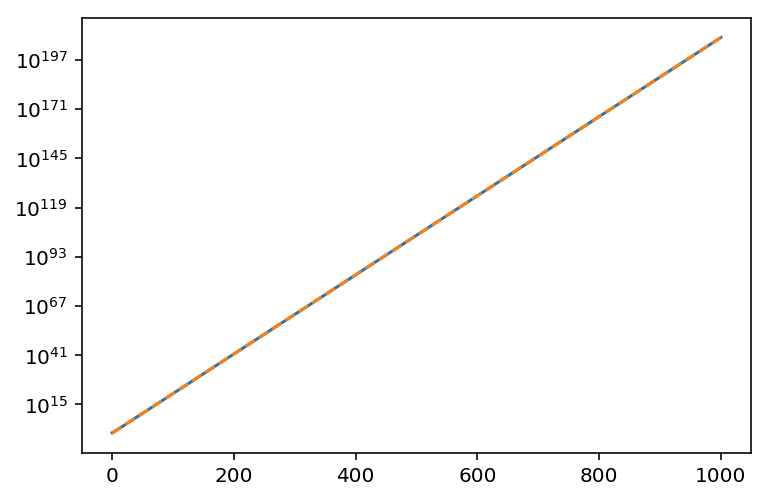

In [44]:
# Fibonacci 1. ve 2. yöntemin grafikleri

from math import log
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

n = 1000

Fn = [1, 1]
i = 0
while i<n-1:
    Fn += [Fn[-1] + Fn[-2]]
    i = i + 1

FnLog = [log(F,10) for F in Fn]

Fnf = lambda n: (((1+5**.5)/2)**n - ((1-5**.5)/2)**n)/5**.5
Fnn = [Fnf(i) for i in range(1, n+2)]
FnnLog = [log(F,10) for F in Fnn]

plt.semilogy(Fn)
plt.plot(Fnn, '--')
plt.show()